In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:/ds_projects/tips (data for regression problem).csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
data.shape

(244, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
x=data.drop(columns=["tip"])
y=data.tip

In [8]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,train_size=0.8,random_state=100)

In [10]:
x["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
x_train = pd.get_dummies(x_train, columns=['sex'],drop_first=True)
x_valid = pd.get_dummies(x_valid, columns=['sex'],drop_first=True)

In [12]:
x_train.head()

,total_bill,smoker,day,time,size,sex_Male
29,19.65,No,Sat,Dinner,2,False
42,13.94,No,Sun,Dinner,2,True
115,17.31,No,Sun,Dinner,2,False
165,24.52,No,Sun,Dinner,3,True
222,8.58,Yes,Fri,Lunch,1,True


In [13]:
x_valid.head()

,total_bill,smoker,day,time,size,sex_Male
65,20.08,No,Sat,Dinner,3,True
59,48.27,No,Sat,Dinner,4,True
191,19.81,Yes,Thur,Lunch,2,False
111,7.25,No,Sat,Dinner,1,False
112,38.07,No,Sun,Dinner,3,True


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train['Day'] = le.fit_transform(x_train['day'])
x_valid['Day'] = le.transform(x_valid['day'])
x_train.drop(columns=["day"],inplace=True)
x_valid.drop(columns=["day"],inplace=True)

In [15]:
x_train.head()

,total_bill,smoker,time,size,sex_Male,Day
29,19.65,No,Dinner,2,False,1
42,13.94,No,Dinner,2,True,2
115,17.31,No,Dinner,2,False,2
165,24.52,No,Dinner,3,True,2
222,8.58,Yes,Lunch,1,True,0


In [16]:
x_valid.head()

,total_bill,smoker,time,size,sex_Male,Day
65,20.08,No,Dinner,3,True,1
59,48.27,No,Dinner,4,True,1
191,19.81,Yes,Lunch,2,False,3
111,7.25,No,Dinner,1,False,1
112,38.07,No,Dinner,3,True,2


In [17]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['smoker'])
x_train= encoder.fit_transform(x_train)
x_valid= encoder.fit_transform(x_valid)
x_train.drop(columns=["smoker_0"],inplace=True)
x_valid.drop(columns=["smoker_0"],inplace=True)

In [18]:
x_train.head()

,total_bill,smoker_1,time,size,sex_Male,Day
29,19.65,1,Dinner,2,False,1
42,13.94,1,Dinner,2,True,2
115,17.31,1,Dinner,2,False,2
165,24.52,1,Dinner,3,True,2
222,8.58,0,Lunch,1,True,0


In [19]:
x_valid.head()

,total_bill,smoker_1,time,size,sex_Male,Day
65,20.08,1,Dinner,3,True,1
59,48.27,1,Dinner,4,True,1
191,19.81,0,Lunch,2,False,3
111,7.25,1,Dinner,1,False,1
112,38.07,1,Dinner,3,True,2


In [20]:
le = LabelEncoder()
x_train['Time'] = le.fit_transform(x_train['time'])
x_valid['Time'] = le.transform(x_valid['time'])
x_train.drop(columns=["time"],inplace=True)
x_valid.drop(columns=["time"],inplace=True)

In [21]:
x_train.head()

,total_bill,smoker_1,size,sex_Male,Day,Time
29,19.65,1,2,False,1,0
42,13.94,1,2,True,2,0
115,17.31,1,2,False,2,0
165,24.52,1,3,True,2,0
222,8.58,0,1,True,0,1


In [22]:
x_valid.head()

,total_bill,smoker_1,size,sex_Male,Day,Time
65,20.08,1,3,True,1,0
59,48.27,1,4,True,1,0
191,19.81,0,2,False,3,1
111,7.25,1,1,False,1,0
112,38.07,1,3,True,2,0


LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_valid)

# Evaluation
mse_linear = mean_squared_error(y_valid, y_pred_linear)
r2_linear = r2_score(y_valid, y_pred_linear)

print('mse for linear regression=',mse_linear)
print('r2 for linear regression=', r2_linear)

mse for linear regression= 1.2946830884866731
r2 for linear regression= 0.5174495087963866


RIDGE REGRESSION

In [24]:
from sklearn.linear_model import Ridge
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_valid)
mse_ridge = mean_squared_error(y_valid, y_pred_ridge)
r2_ridge = r2_score(y_valid, y_pred_ridge)

print('mse for Ridge Regression=',mse_ridge)
print('r2 for Ridge Regression=',r2_ridge)

mse for Ridge Regression= 1.2916403791737843
r2 for Ridge Regression= 0.5185835785054769


LASSO REGRESSION

In [25]:
from sklearn.linear_model import Lasso
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_valid)
mse_lasso = mean_squared_error(y_valid, y_pred_lasso)
r2_lasso = r2_score(y_valid, y_pred_lasso)

print('mse for Lasso Regression=',mse_lasso)
print('r2 for Lasso Regression=',r2_lasso)

mse for Lasso Regression= 1.209907960542419
r2 for Lasso Regression= 0.5490466463469865


DECISION TREE REGRESSION


In [26]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=100)
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_valid)
mse_tree = mean_squared_error(y_valid, y_pred_tree)
r2_tree = r2_score(y_valid, y_pred_tree)

print('mse for Decision Tree Model=',mse_tree)
print('r2 for Decision Tree Model=',r2_tree)

mse for Decision Tree Model= 2.1011716707070787
r2 for Decision Tree Model= 0.21685744502311477


RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_valid)
mse_rf = mean_squared_error(y_valid, y_pred_rf)
r2_rf = r2_score(y_valid, y_pred_rf)

print('mse for Random Forest Model=',mse_rf)
print('r2 for Random Forest Model=',r2_rf)

mse for Random Forest Model= 1.3003697167367654
r2 for Random Forest Model= 0.5153300053597718


SUPPORT VECTOR REGRESSION 

In [28]:
from sklearn.svm import SVR

# Support Vector Regression
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_valid)
mse_svr = mean_squared_error(y_valid, y_pred_svr)
r2_svr = r2_score(y_valid, y_pred_svr)

print('mse for Random Forest Model=',mse_rf)
print('r2 for Random Forest Model=',r2_rf)

mse for Random Forest Model= 1.3003697167367654
r2 for Random Forest Model= 0.5153300053597718


K NEAREST NEIGHBORS

In [29]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_valid)
mse_knn = mean_squared_error(y_valid, y_pred_knn)
r2_knn = r2_score(y_valid, y_pred_knn)

print('mse for Random KNN Model=',mse_knn)
print('r2 for Random KNN Model=',r2_knn)

mse for Random KNN Model= 1.6416786938775514
r2 for Random KNN Model= 0.3881183224111655


In [30]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Assuming x is feature and y is the target variable for regression
mi_scores = mutual_info_regression(x_train, y_train)

# Display scores in a DataFrame
mi_df = pd.DataFrame({'Feature': x_train.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)

      Feature  Mutual Information
0  total_bill            0.288824
2        size            0.095547
4         Day            0.087355
1    smoker_1            0.048777
3    sex_Male            0.000000
5        Time            0.000000


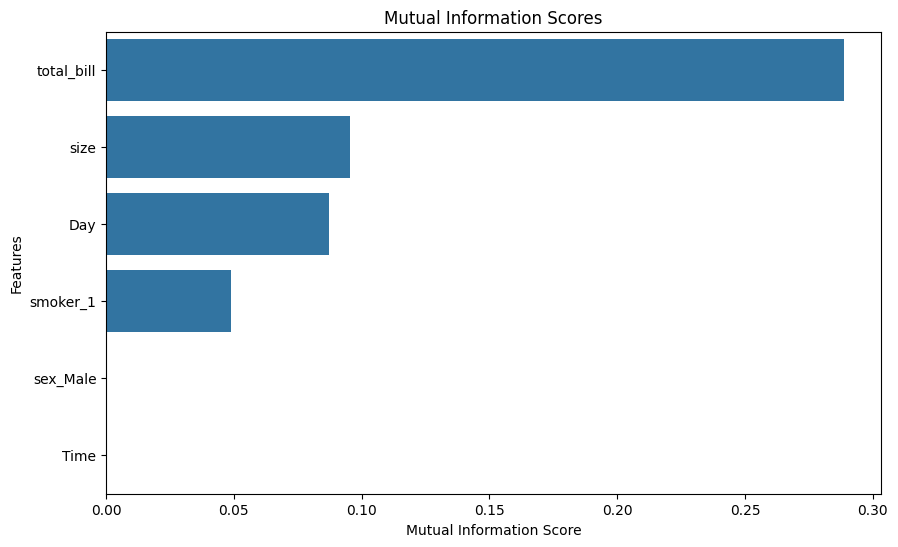

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Mutual Information", y="Feature", data=mi_df)
plt.title("Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

SCATTER PLOT

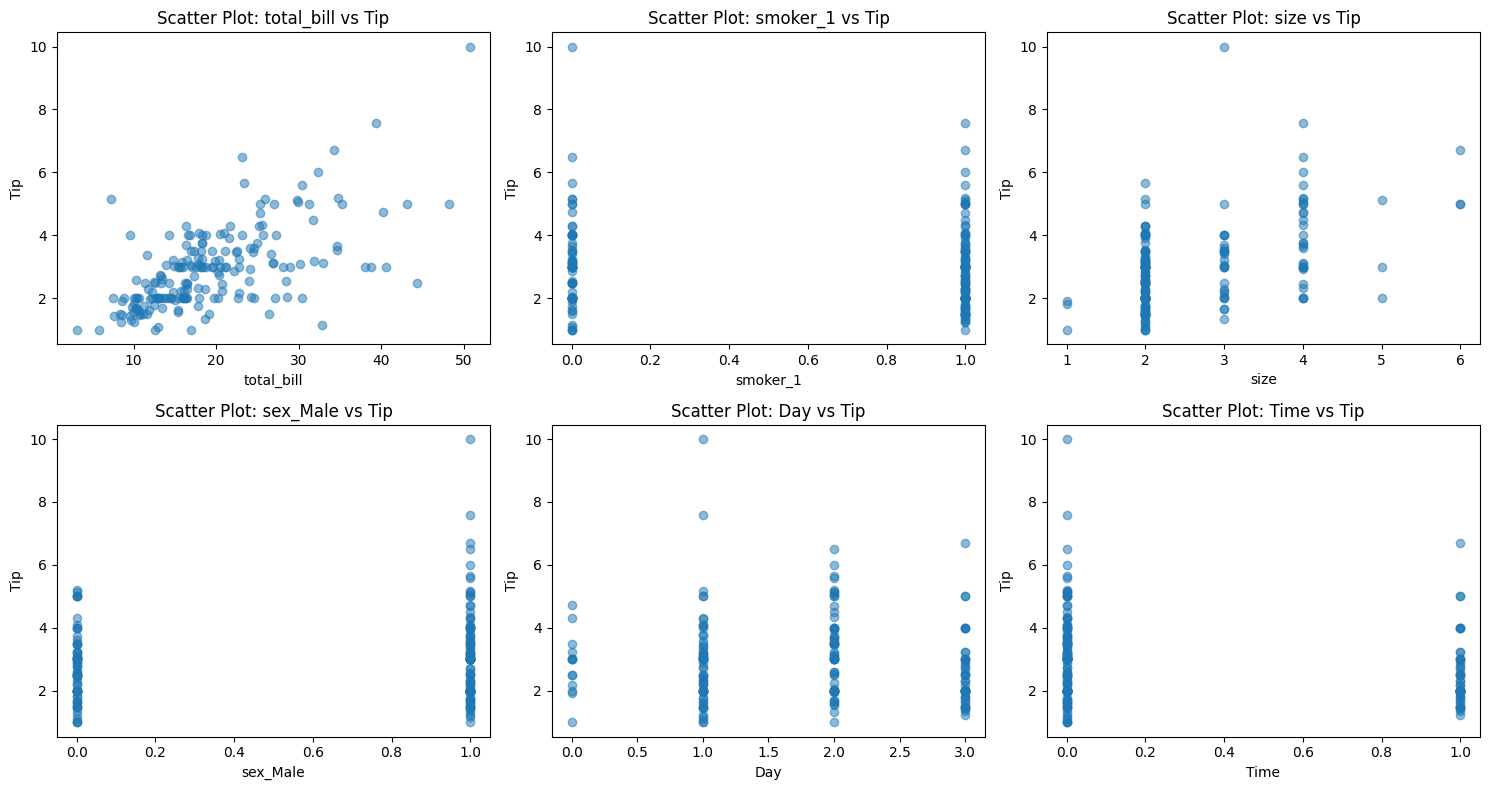

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i, predictor in enumerate(x_train.columns, 1):
    plt.subplot(2, (len(x_train.columns) + 1) // 2, i)
    plt.scatter(x_train[predictor], y_train, alpha=0.5)
    plt.title(f'Scatter Plot: {predictor} vs Tip')
    plt.xlabel(predictor)
    plt.ylabel('Tip')
plt.tight_layout()
plt.show()


PAIR PLOT FOR MULTIPLE FEATURES

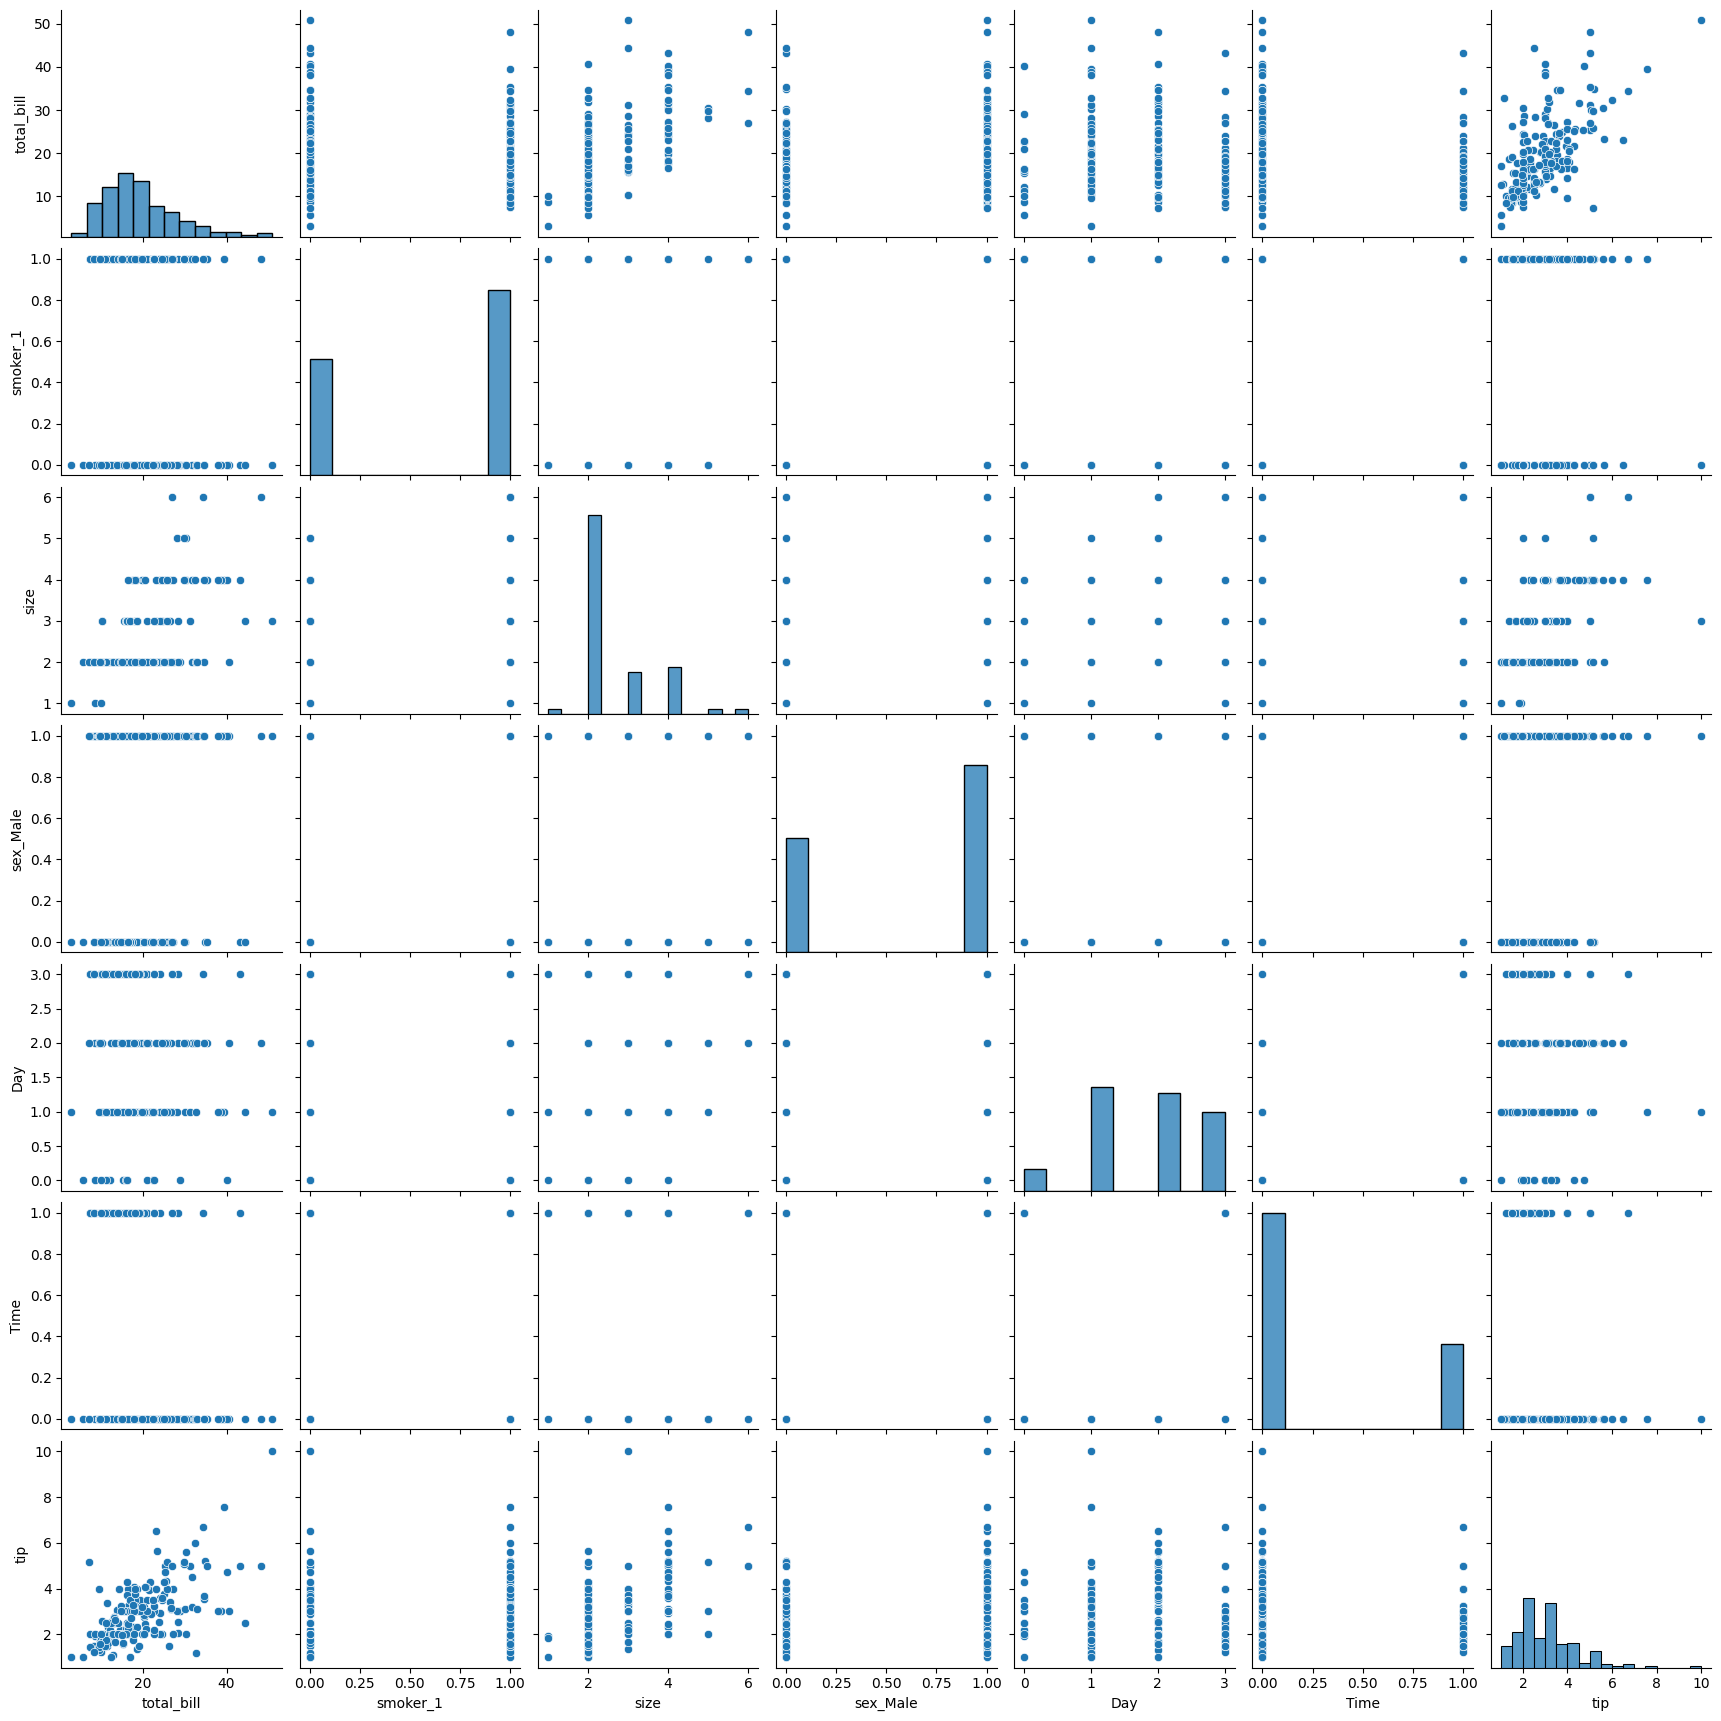

In [35]:
import seaborn as sns
# Concatenate `x_train` and `y_train` for pair plot
train_data = x_train.copy()
train_data['tip'] = y_train

# Pair plot
sns.pairplot(train_data)
plt.show()


CORRELATION MATRIX [HEAT MAP]

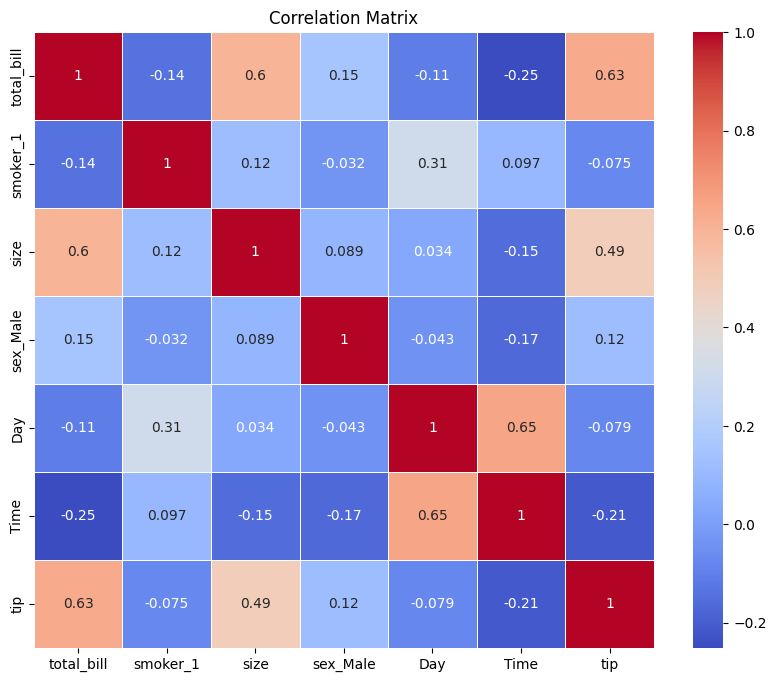

In [36]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


RAINBOW TEST FOR LINEARITY

In [37]:
# Convert boolean columns in x_train to integers
x_train = x_train.astype({col: 'int' for col in x_train.select_dtypes('bool').columns})
x_valid = x_valid.astype({col: 'int' for col in x_valid.select_dtypes('bool').columns})

In [38]:
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

# Adding a constant to `x_train` for intercept
x_train_const = sm.add_constant(x_train)

# Fit an OLS model
model = sm.OLS(y_train, x_train_const).fit()

# Rainbow test for linearity
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f'Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_value}')

# Interpretation
if rainbow_p_value > 0.05:
    print("No evidence against linearity (p-value > 0.05). The data may follow a linear trend.")
else:
    print("Evidence against linearity (p-value <= 0.05). The data may not follow a linear trend.")


Rainbow test statistic: 0.9992488197194547, p-value: 0.5026183124409858
No evidence against linearity (p-value > 0.05). The data may follow a linear trend.


RESIDUAL PLOTS 

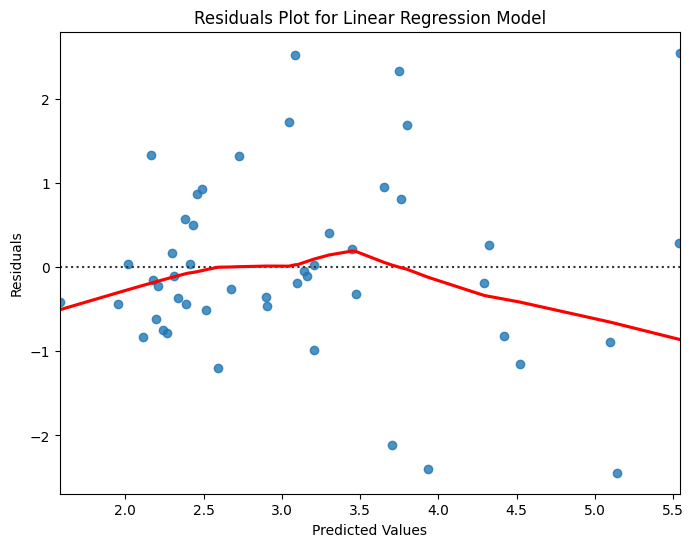

In [40]:
residuals = y_valid - y_pred_linear

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_linear, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

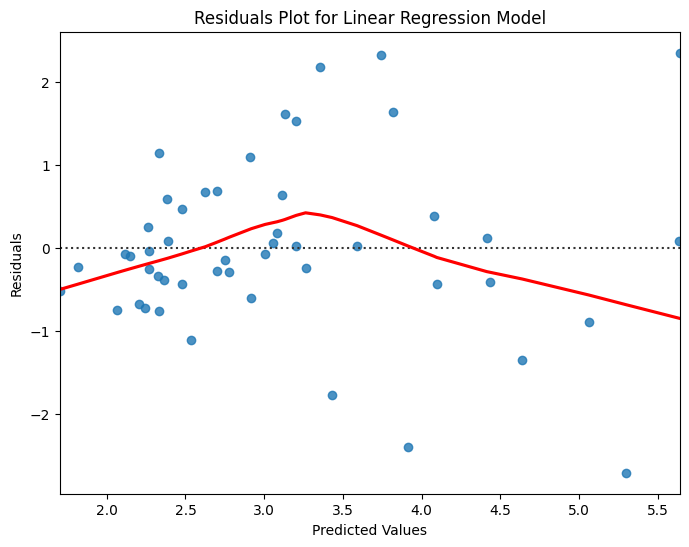

In [41]:
residuals = y_valid - y_pred_lasso
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_lasso, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

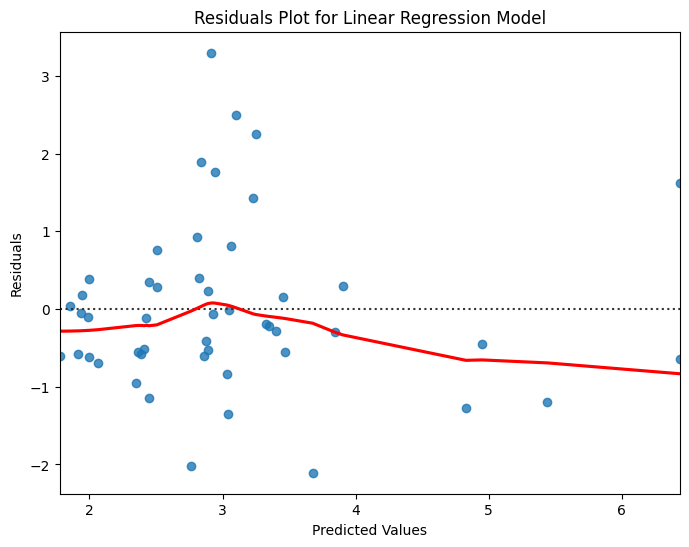

In [42]:
residuals = y_valid - y_pred_rf
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_rf, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()